In [1]:
import tensorflow as tf
import numpy as np



# Data.
max_val = 26
mod = 26

K = np.random.randint(0, 27, size=(250_000,)).reshape(-1, 1)
I = np.random.randint(0, max_val, size=(250_000,)).reshape(-1, 1)
print(I.shape)
print(K.shape)
X = np.hstack((I,K))
Y = (K + I) % 26

# validation Data.
Kv = np.random.randint(0, 27, size=(10_000,)).reshape(-1, 1)
Iv = np.random.randint(0, max_val, size=(10_000,)).reshape(-1, 1)
Xv = np.hstack((Iv,Kv))
Yv = (Kv + Iv) % 26

# Model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, 'relu', input_shape=(2,)),
    tf.keras.layers.Dense(26, 'softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train.
history = model.fit(X, Y, batch_size=100, epochs=120, validation_data=(Xv, Yv))


(250000, 1)
(250000, 1)


Epoch 1/120


2500/2500 [==============================] - 5s 2ms/step - loss: 2.9382 - accuracy: 0.1011 - val_loss: 2.5876 - val_accuracy: 0.1826
Epoch 2/120
2500/2500 [==============================] - 4s 2ms/step - loss: 2.1955 - accuracy: 0.3261 - val_loss: 1.8671 - val_accuracy: 0.3891
Epoch 3/120
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6365 - accuracy: 0.5444 - val_loss: 1.4356 - val_accuracy: 0.6414
Epoch 4/120
2500/2500 [==============================] - 4s 2ms/step - loss: 1.2797 - accuracy: 0.7200 - val_loss: 1.1458 - val_accuracy: 0.7629
Epoch 5/120
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0377 - accuracy: 0.8200 - val_loss: 0.9386 - val_accuracy: 0.8046
Epoch 6/120
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8670 - accuracy: 0.8629 - val_loss: 0.7949 - val_accuracy: 0.8710
Epoch 7/120
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7368 - accuracy: 0.885

In [2]:
number = 5
key = 6
input_array = np.array([[number, key]])

pred = model.predict(input_array)


pred.argmax(axis=1)
    


1/1 [==============================] - 0s 84ms/step


array([11], dtype=int64)

In [3]:
(5 + 5) % 26 

10

In [4]:
# Test Data.
Kt = np.random.randint(0, 27, size=(10_000,)).reshape(-1, 1)
It = np.random.randint(0, max_val, size=(10_000,)).reshape(-1, 1)
Xt = np.hstack((It,Kt))
Yt = (Kt + It) % 26

Y_preds = model.predict(Xt)

Y_preds = Y_preds.argmax(axis=1)

  1/313 [..............................] - ETA: 7s

313/313 [==============================] - 0s 1ms/step


In [5]:
from sklearn.metrics import classification_report

print(classification_report(Yt, Y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       365
           1       1.00      1.00      1.00       411
           2       1.00      1.00      1.00       381
           3       1.00      1.00      1.00       385
           4       1.00      1.00      1.00       386
           5       1.00      1.00      1.00       373
           6       1.00      1.00      1.00       350
           7       1.00      1.00      1.00       396
           8       1.00      1.00      1.00       394
           9       1.00      1.00      1.00       379
          10       1.00      1.00      1.00       425
          11       1.00      1.00      1.00       389
          12       1.00      1.00      1.00       398
          13       1.00      1.00      1.00       367
          14       1.00      1.00      1.00       398
          15       1.00      1.00      1.00       365
          16       1.00      1.00      1.00       375
          17       1.00    

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
loss = history.history['loss']
epochs = list(range(120))

Text(0.5, 1.0, 'Loss vs Epoch')

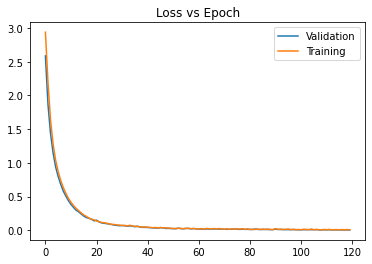

In [8]:
sns.lineplot(x=epochs, y=val_loss, label='Validation')
sns.lineplot(x=epochs, y=loss,label='Training')
plt.legend()
plt.title('Loss vs Epoch')

Text(0.5, 1.0, 'Accuracy vs Epoch')

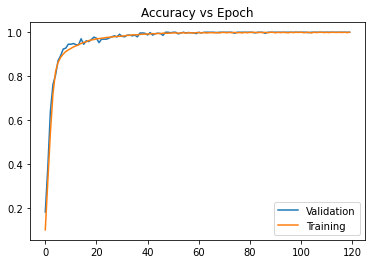

In [9]:
sns.lineplot(x=epochs, y=val_acc, label='Validation')
sns.lineplot(x=epochs, y=acc, label='Training')
plt.legend()
plt.title('Accuracy vs Epoch')

In [10]:
model.save('./caesar_stream.keras')